In [1]:
import pandas as pd
# Reload for a clean session
merged_df = pd.read_csv('../output/pisa_ses_tracking_merged.csv')
print(merged_df.head())

  Country Subject       SES       Coef        SE  CNT Country_Name  \
0     ESP    MATH      ESCS  32.325643  0.553436  ESP        Spain   
1     ESP    MATH  PAREDINT   6.718253  0.189549  ESP        Spain   
2     ESP    MATH     HISEI   1.092689  0.022805  ESP        Spain   
3     ESP    READ      ESCS  30.542562  0.864474  ESP        Spain   
4     ESP    READ  PAREDINT   6.694703  0.304785  ESP        Spain   

  tracking_age  
0           16  
1           16  
2           16  
3           16  
4           16  


/var/folders/b0/czsnk64s6wdcpxlyxxbmgxv80000gn/T/ipykernel_64128/1560399104.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


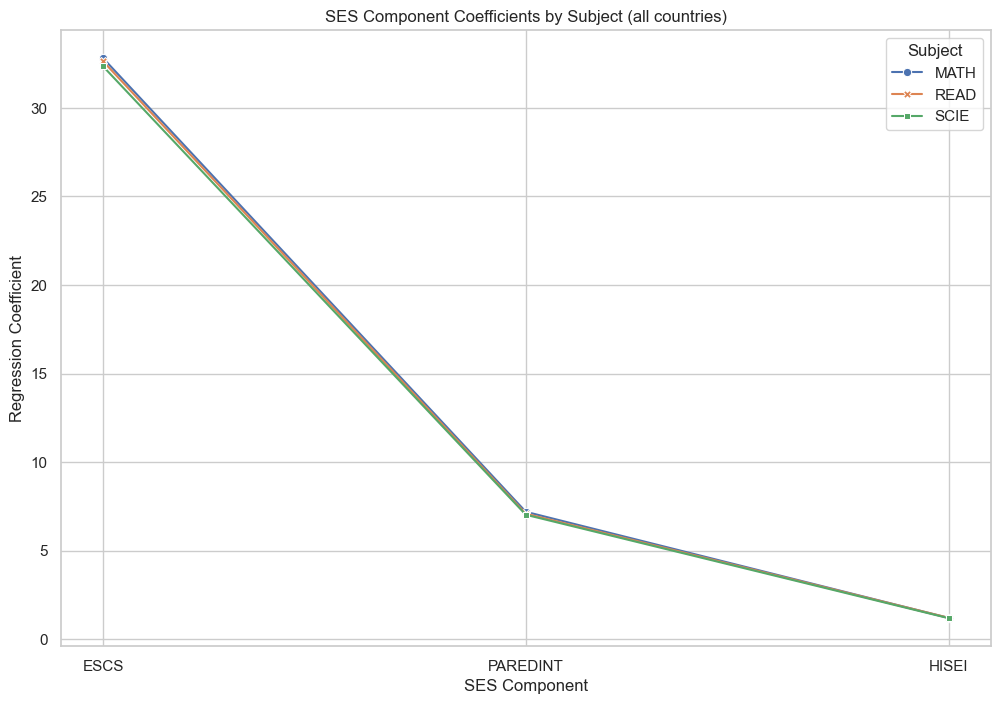

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Basic pivot not needed here—seaborn can handle long format
sns.set(style="whitegrid")

plt.figure(figsize=(12,8))
sns.lineplot(
    data=merged_df,
    x="SES",
    y="Coef",
    hue="Subject",
    style="Subject",
    markers=True,
    dashes=False,
    ci=None
)
plt.title("SES Component Coefficients by Subject (all countries)")
plt.ylabel("Regression Coefficient")
plt.xlabel("SES Component")
plt.show()

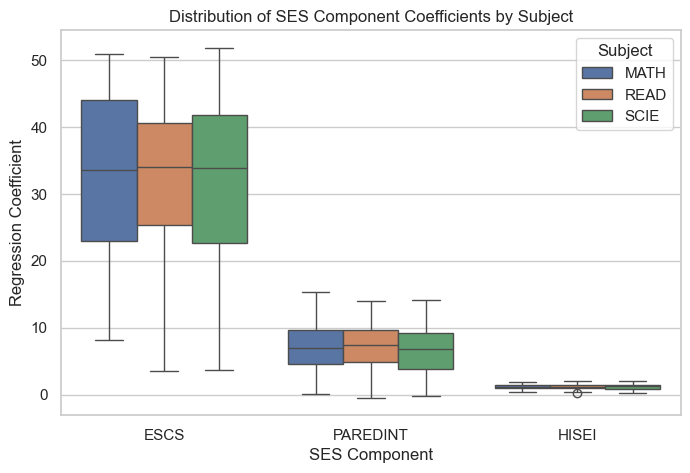

In [3]:
plt.figure(figsize=(8,5))
sns.boxplot(data=merged_df, x="SES", y="Coef", hue="Subject")
plt.title("Distribution of SES Component Coefficients by Subject")
plt.ylabel("Regression Coefficient")
plt.xlabel("SES Component")
plt.show()

/var/folders/b0/czsnk64s6wdcpxlyxxbmgxv80000gn/T/ipykernel_64128/536726649.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=merged_df, x="SES", y="Coef", hue="Subject", dodge=0.4, ci=None, markers='d', linestyles='--')


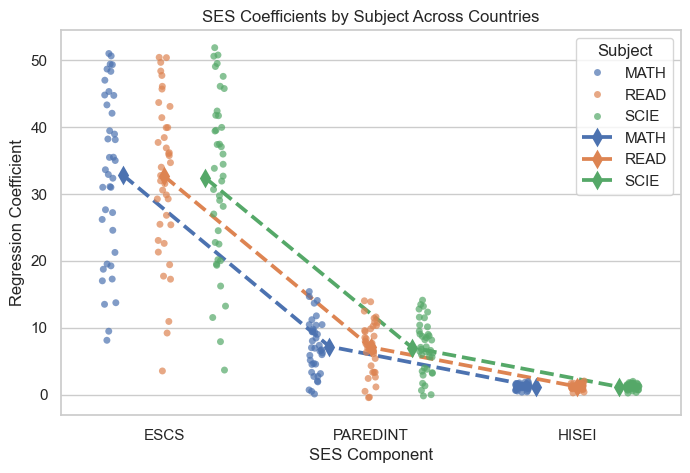

In [4]:
plt.figure(figsize=(8,5))
sns.stripplot(data=merged_df, x="SES", y="Coef", hue="Subject", dodge=True, alpha=0.7)
sns.pointplot(data=merged_df, x="SES", y="Coef", hue="Subject", dodge=0.4, ci=None, markers='d', linestyles='--')
plt.title("SES Coefficients by Subject Across Countries")
plt.ylabel("Regression Coefficient")
plt.xlabel("SES Component")
plt.legend(title="Subject")
plt.show()

In [5]:
summary_df = merged_df.groupby(['SES', 'Subject'])['Coef'].agg(['mean', 'std']).reset_index()
summary_df.rename(columns={'mean': 'Mean_Coefficient', 'std': 'SD_Coefficient'}, inplace=True)
print(summary_df)

        SES Subject  Mean_Coefficient  SD_Coefficient
0      ESCS    MATH         32.808194       12.484144
1      ESCS    READ         32.631493       11.763646
2      ESCS    SCIE         32.344002       12.741618
3     HISEI    MATH          1.201630        0.390587
4     HISEI    READ          1.208918        0.385657
5     HISEI    SCIE          1.185435        0.409066
6  PAREDINT    MATH          7.192474        3.991051
7  PAREDINT    READ          7.085565        3.720693
8  PAREDINT    SCIE          7.025356        3.855713


In [ ]:
# Aggregate mean ± SD
summary_df = (
    merged_df
    .groupby(['SES', 'Subject'])['Coef']
    .agg(['mean', 'std'])
    .reset_index()
)

# Round for readability
summary_df['Mean ± SD'] = summary_df.apply(lambda row: f"{row['mean']:.2f} ± {row['std']:.2f}", axis=1)
final_table = summary_df.pivot(index='SES', columns='Subject', values='Mean ± SD')
final_table = final_tabTH', 'READ', 'SCIE']]  # Ensure consistent column order

print(final_table)

Subject            MATH           READ           SCIE
SES                                                  
ESCS      32.81 ± 12.48  32.63 ± 11.76  32.34 ± 12.74
HISEI       1.20 ± 0.39    1.21 ± 0.39    1.19 ± 0.41
PAREDINT    7.19 ± 3.99    7.09 ± 3.72    7.03 ± 3.86
